# Statistics of Extracted Data on mHealth Apps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

result_df = pd.read_csv("../data/mhealth_apps.csv")

In [2]:
result_df.columns

Index(['app_name', 'app_id', 'categories', 'content_rating', 'updated_on',
       'downloads', 'free', 'offersIAP', 'top_grossing', 'is_privacy_policy',
       'countries', 'inAppProductPrice', 'privacy_policy_link', 'permissions',
       'num_permissions', 'dangerous_permissions', 'num_dangerous_permissions',
       'trackers', 'num_trackers'],
      dtype='object')

In [3]:
def extract_unique_item(dataframe):
    unique_items = set()
    for items in dataframe.dropna():
        unique_items.update(str(items).split(", "))
    return unique_items
    

# Calculate statistics
total_apps_queried = len(result_df)
unique_df = result_df.drop_duplicates(subset='app_id')

total_unique_apps = len(unique_df)
average_downloads = unique_df['downloads'].replace({'\+': '', ',': ''}, regex=True).astype(int).mean()
total_downloads = unique_df['downloads'].replace({'\+': '', ',': ''}, regex=True).astype(int).sum()
total_privacy_policy_yes = (unique_df['is_privacy_policy'] == 'Yes').sum()
total_privacy_policy_no = (unique_df['is_privacy_policy'] == 'No').sum()
total_apps_by_category = unique_df['categories'].value_counts()
category_percentage = (total_apps_by_category / total_unique_apps * 100).round(2)

total_unique_permissions = len(extract_unique_item(unique_df['permissions']))
total_unique_danger_permissions = len(extract_unique_item(unique_df['dangerous_permissions']))
total_unique_countries = len(extract_unique_item(unique_df['countries']))
total_unique_trackers = len(extract_unique_item(unique_df['trackers']))

total_free_apps = (unique_df['free'] == True).sum()
total_paid_apps = (unique_df['free'] == False).sum()
total_offersIAP = (unique_df['offersIAP'] == True).sum()
total_not_offersIAP = (unique_df['offersIAP'] == False).sum()
total_top_grossing = (unique_df['top_grossing'] == 'Yes').sum()
total_with_inAppProductPrice = unique_df['inAppProductPrice'].notnull().sum()

# Display the statistics
print("Statistics of all mHealth Apps:")
print("=" * 40)
print(f"{'Total Apps Queried:':<40} {total_apps_queried}")
print(f"{'Total Unique Apps Found:':<40} {total_unique_apps}")
print(f"{'Total downloads of All Apps:':<40} {total_downloads:.2f}")
print(f"{'Average downloads of All Apps:':<40} {average_downloads:.2f}")
print(f"{'Total Unique countries:':<40} {total_unique_countries}")
print(f"{'Total Privacy Policy (Yes):':<40} {total_privacy_policy_yes}")
print(f"{'Total Privacy Policy (No):':<40} {total_privacy_policy_no}")
print(f"{'Total free Apps:':<40} {total_free_apps}")
print(f"{'Total Paid Apps:':<40} {total_paid_apps}")
print(f"{'Total Apps offer in App Purchase:':<40} {total_offersIAP}")
print(f"{'Total Apps DO NOT offer in App Purchase:':<40} {total_not_offersIAP}")
print(f"{'Total Apps with in App Product Price:':<40} {total_with_inAppProductPrice}")
print(f"{'Total Top-Grossing Apps:':<40} {total_top_grossing}")
print(f"{'Total Number of categories:':<40} {len(total_apps_by_category)}")  # Fixed this line

print("\nStatistics of Categories:")
print("=" * 40)
for category, percent in category_percentage.items():
    print(f"{category:<40} {percent:.2f}%")
print()
print("\nStatistics of permissions and trackers:")
print("=" * 40)
print(f"{'Total Unique permissions:':<40} {total_unique_permissions}")
print(f"{'Total Unique Dangerous permissions:':<40} {total_unique_danger_permissions}")
print(f"{'Total Unique trackers:':<40} {total_unique_trackers}")

Statistics of all mHealth Apps:
Total Apps Queried:                      854
Total Unique Apps Found:                 854
Total downloads of All Apps:             8677299259.00
Average downloads of All Apps:           10160771.97
Total Unique countries:                  225
Total Privacy Policy (Yes):              854
Total Privacy Policy (No):               0
Total free Apps:                         829
Total Paid Apps:                         25
Total Apps offer in App Purchase:        319
Total Apps DO NOT offer in App Purchase: 535
Total Apps with in App Product Price:    456
Total Top-Grossing Apps:                 187
Total Number of categories:              18

Statistics of Categories:
Health & Fitness                         62.76%
Medical                                  21.08%
Parenting                                5.04%
Education                                2.93%
Lifestyle                                2.81%
Shopping                                 1.17%
Productivity 

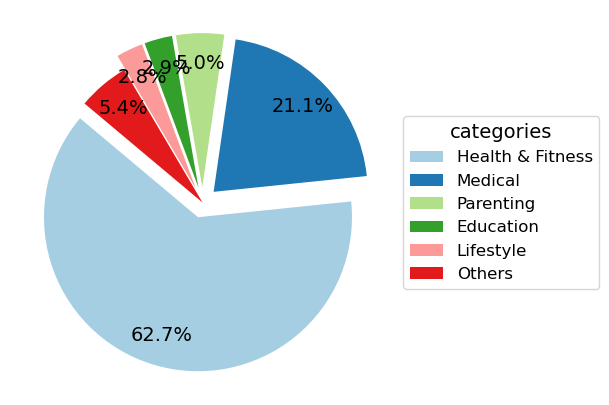

In [4]:
import matplotlib.pyplot as plt

top_categories = category_percentage.head(5)
other_categories = category_percentage[5:].sum()

# Prepare data for pie chart
labels = top_categories.index.tolist() + ['Others']
sizes = top_categories.tolist() + [other_categories]
explode = [0.1] * 5 + [0]

plt.figure(figsize=(5, 5))

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,  # remove labels from pie
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    explode=explode,
    pctdistance=0.8,
    textprops={'fontsize': 14}
)

plt.legend(labels, title="categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14)

plt.savefig('../figures/apps_by_category.png', bbox_inches='tight')
plt.show()

In [5]:
import pandas as pd

usa = ['us']

# source: https://www.gdpradvisor.co.uk/gdpr-countries
GDPR_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 
                  'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
                  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

country_list = pd.read_csv("../data/country_list.csv")

europe = []

for country in GDPR_countries:
    matching_countries = country_list[country_list['country_name'].str.contains(country, na=False)]
    europe.extend(matching_countries['country_code'].tolist())

print(len(europe)-1)
print(europe)

28
['at', 'be', 'bg', 'hr', 'cy', 'cz', 'dk', 'ee', 'fi', 'fr', 'de', 'gr', 'hu', 'ie', 'it', 'lv', 'lt', 'lu', 'mt', 'nl', 'pl', 'pt', 'ro', 'sk', 'si', 'es', 'se', 'uk', 'gb']


In [6]:
def filter_data(df):

    def country_filter(countries, country_set):
        return any(country.lower() in country_set for country in countries)

    countries_list = df['countries'].str.split(', ').explode()
    usa_europe = set(usa + europe)
    rest_of_world = set(countries_list) - usa_europe
    
    df['country_split'] = df['countries'].str.split(', ')
    us_filtered_df = df[df['country_split'].apply(lambda x: country_filter(x, usa))]
    europe_filtered_df = df[df['country_split'].apply(lambda x: country_filter(x, europe))]
    row_filtered_df = df[df['country_split'].apply(lambda x: country_filter(x, rest_of_world))]

    print('Number of apps available in USA:', len(us_filtered_df))
    print('Number of apps available in Europe:', len(europe_filtered_df))
    print('Number of apps available in RoW:', len(row_filtered_df))
    
    return us_filtered_df, europe_filtered_df, row_filtered_df

In [7]:
import pandas as pd

result_df = pd.read_csv("../data/mhealth_apps.csv")

# Function to compute statistics by region
def compute_statistics(df):
    total_unique_apps = df['app_id'].nunique()
    average_downloads = df['downloads'].replace({'\+': '', ',': ''}, regex=True).astype(int).mean()
    unique_permissions = len(extract_unique_item(df['permissions']))
    unique_dangerous_permissions = len(extract_unique_item(df['dangerous_permissions']))
    unique_trackers = len(extract_unique_item(df['trackers']))
    
    return {
        'Total Unique Apps Found': total_unique_apps,
        'Average downloads of All Apps': average_downloads,
        'Total Unique permissions': unique_permissions,
        'Total Unique Dangerous permissions': unique_dangerous_permissions,
        'Total Unique trackers': unique_trackers,
    }

usa_df, europe_df, rest_of_world_df = filter_data(result_df)

usa_stats = compute_statistics(usa_df)
europe_stats = compute_statistics(europe_df)
rest_of_world_stats = compute_statistics(rest_of_world_df)

# Display statistics
print("\nStatistics by Region:")
print("=" * 40)
for region, stats in zip(['USA', 'Europe', 'Rest of the World'], [usa_stats, europe_stats, rest_of_world_stats]):
    print(f"\n{region}:")
    for stat_name, value in stats.items():
        print(f"{stat_name:<40} {value}")


Number of apps available in USA: 360
Number of apps available in Europe: 389
Number of apps available in RoW: 832

Statistics by Region:

USA:
Total Unique Apps Found                  360
Average downloads of All Apps            17984876.21111111
Total Unique permissions                 697
Total Unique Dangerous permissions       49
Total Unique trackers                    124

Europe:
Total Unique Apps Found                  389
Average downloads of All Apps            17605565.390745502
Total Unique permissions                 787
Total Unique Dangerous permissions       50
Total Unique trackers                    118

Rest of the World:
Total Unique Apps Found                  832
Average downloads of All Apps            10411817.876201924
Total Unique permissions                 1064
Total Unique Dangerous permissions       50
Total Unique trackers                    152


In [8]:
us_category_count = usa_df['categories'].value_counts()
us_category_count

categories
Health & Fitness     207
Medical              115
Parenting             20
Lifestyle              8
Education              4
Sports                 2
Food & Drink           1
Books & Reference      1
Simulation             1
Productivity           1
Name: count, dtype: int64

In [9]:
eu_category_count = europe_df['categories'].value_counts()
eu_category_count

categories
Health & Fitness     224
Medical              121
Parenting             21
Lifestyle              9
Education              8
Productivity           2
Books & Reference      1
Simulation             1
Business               1
Sports                 1
Name: count, dtype: int64

In [10]:
row_category_count = rest_of_world_df['categories'].value_counts()
row_category_count

categories
Health & Fitness     523
Medical              173
Parenting             42
Education             25
Lifestyle             24
Shopping              10
Productivity           7
Food & Drink           5
Simulation             4
Tools                  4
Books & Reference      3
Sports                 3
Business               3
Social                 2
Music & Audio          1
Beauty                 1
Trivia                 1
Communication          1
Name: count, dtype: int64

In [11]:
import re

def extract_unique_countries(dataframe_column):
    unique_countries = set()
    for countries in dataframe_column.dropna():
        unique_countries.update(str(countries).split(", "))
    return unique_countries

print("Total European countries in the list:", len(europe)-1)

europe_pattern = r'\b(' + '|'.join(europe) + r')\b'

# Extract unique countries
european_countries = set()
countries = extract_unique_countries(europe_df['countries'])

# Match countries with the European pattern
for country in countries:
    if re.match(europe_pattern, country.strip(), re.IGNORECASE):
        european_countries.add(country)

print("Total found European countries:", len(european_countries)-1)

Total European countries in the list: 28
Total found European countries: 28
